<a href="https://colab.research.google.com/github/khanghoang2351-design/Vohoangkhang/blob/main/NH%E1%BA%ACN_DI%E1%BB%86N_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8702 - loss: 0.4502
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9653 - loss: 0.1175
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0757
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0377


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


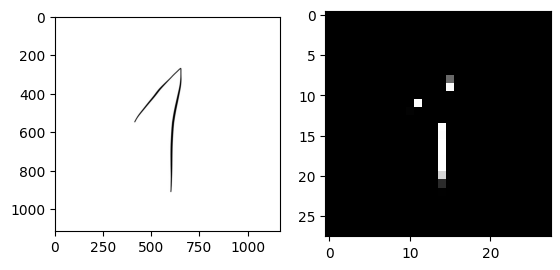

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
#plt.imshow(x_train[600], cmap = plt.cm.binary)
#plt.show()
#print(y_train[600])

#for i in range(25) :
#    plt.subplot(5,5,i+1)
#    plt.imshow(x_train[300+i], cmap = 'gray' , interpolation = 'none')
#    plt.title('so : {}'.format(y_train[300+i]))
#chuan hoa
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical #chia thanh nhieu nhom -> ONe hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#tao mo hinh

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 5, batch_size = 128)

#luu ma tran bawng model.save('final_model.h5')
model.save('final_model.h5')
# tải nó lại bằng lệnh from keras.model import load_model
#model1 = load_model('final_model.h5')
#start

import numpy as np
import cv2
from keras.models import load_model
model = load_model('final_model.h5')
img = cv2.imread('h1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_gray = cv2.resize(img_gray, (28,28))
img_inverted = 255 - img_gray
img_ready = img_inverted.reshape(1, 28*28).astype('float32')/255

preds = model.predict(img_ready)
digit = np.argmax(preds)

#hien thi
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_ready.reshape(28,28) , cmap = "gray")
plt.show()

In [19]:

import os, cv2, numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

drive.mount('/content/drive')

train_path = "/content/drive/MyDrive/tien_mono/TIỀN_MONO/Train"
test_path  = "/content/drive/MyDrive/tien_mono/TIỀN_MONO/Test"
save_model_path = "/content/drive/MyDrive/tien_mono/money_ann_gray.h5"

labels = ["1000vnd","2000vnd","5000vnd","10000vnd","20000vnd","50000vnd"]
img_size = 32

#load
def load_images(folder, labels, augment=False):
    X, y = [], []
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None: continue
        label = None
        for lb in labels:
            if lb in fname.lower() or lb.replace("vnd","_test") in fname.lower():
                label = lb
                break
        if label is None: continue
        img = cv2.resize(img, (img_size,img_size))
        img = img.astype("float32") / 255.0
        X.append(img.flatten())
        y.append(labels.index(label))


        if augment:

            for angle in [-5,5]:
                M = cv2.getRotationMatrix2D((img_size//2,img_size//2), angle, 1)
                img_rot = cv2.warpAffine(img, M, (img_size,img_size))
                X.append(img_rot.flatten())
                y.append(labels.index(label))

            img_bright = np.clip(img*1.1,0,1)
            X.append(img_bright.flatten())
            y.append(labels.index(label))
            img_dark = np.clip(img*0.9,0,1)
            X.append(img_dark.flatten())
            y.append(labels.index(label))

    return np.array(X), to_categorical(np.array(y), num_classes=len(labels))

X_train, y_train = load_images(train_path, labels, augment=True)
X_test, y_test = load_images(test_path, labels)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

model = Sequential([
    Dense(1024, activation='relu', input_shape=(img_size*img_size,)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(len(labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
model.save(save_model_path)
print(f"✅ Model đã lưu tại: {save_model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train: (2900, 1024) (2900, 6)
Test : (120, 1024) (120, 6)
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3632 - loss: 1.5966 - val_accuracy: 0.8667 - val_loss: 0.3441
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8148 - loss: 0.4732 - val_accuracy: 0.9417 - val_loss: 0.1727
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9007 - loss: 0.2556 - val_accuracy: 0.9583 - val_loss: 0.1241
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9185 - loss: 0.2340 - val_accuracy: 0.9917 - val_loss: 0.0700
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.1752 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.0912 - val_accuracy: 0.9917 - val_loss: 0.0177
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9571 - loss: 0.1177 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - loss: 0.1079 - val_accuracy: 1.0000 - val_loss: 0.0505
Ep

✅ Model đã lưu tại: /content/drive/MyDrive/tien_mono/money_ann_gray.h5


In [20]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/tien_mono/money_ann_gray.h5")
labels = ["1000vnd","2000vnd","5000vnd","10000vnd","20000vnd","50000vnd"]
img_size = 32

def predict(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(img_size,img_size))
    img = img.astype("float32")/255.0
    img = img.flatten().reshape(1,-1)
    pred = model.predict(img)
    return labels[np.argmax(pred)]

demo = gr.Interface(fn=predict, inputs=gr.Image(type="numpy"), outputs="text", title="Nhận diện tiền VNĐ")
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e2ba993abeac8aa17b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
